## <span style='font-family:Georgia'> Objectives
The purpose of this notebook is to modeling training process overview \& evaluation of the model's performance on the test set

*Author: Elżbieta Jowik*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import Markdown, display

plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (6.5, 6.5), "axes.facecolor" : "white", "axes.edgecolor":  "black"})

In [2]:
def convert_to_array(matrix: str):
    array = []
    for l in matrix[1:-1].split('\r\n'):
        lst = [int(i.replace(']', '')) for i in l.split() if i.replace(']', '').isdigit()]
        array.append(lst)
    return np.array(array)

### <span style='font-family:Georgia'> Section 1.: Training progress overview

In [3]:
results = pd.read_csv('../data/outputs/modeling_pipeline/step6/training_progress_scores.csv')

#### <span style='font-family:Georgia'> The course of the cost function in the learning process

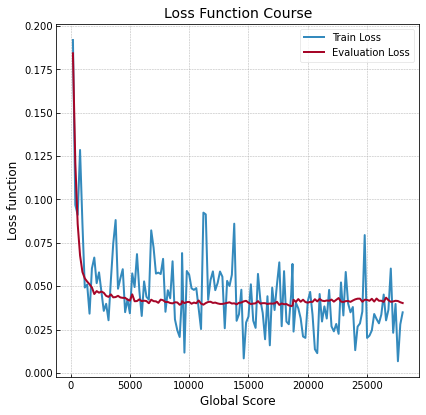

In [4]:
plt.title("Loss Function Course", fontsize=14)
plt.plot(results['global_step'], results['train_loss'], label='Train Loss')
plt.plot(results['global_step'], results['eval_loss'], label='Evaluation Loss')
plt.xlabel("Global Score", fontsize=12)
plt.ylabel("Loss function", fontsize=12)
plt.legend()
plt.show()

#### <span style='font-family:Georgia'> The courses of the Precision, Recall & Weighted F1 scores in the learning process

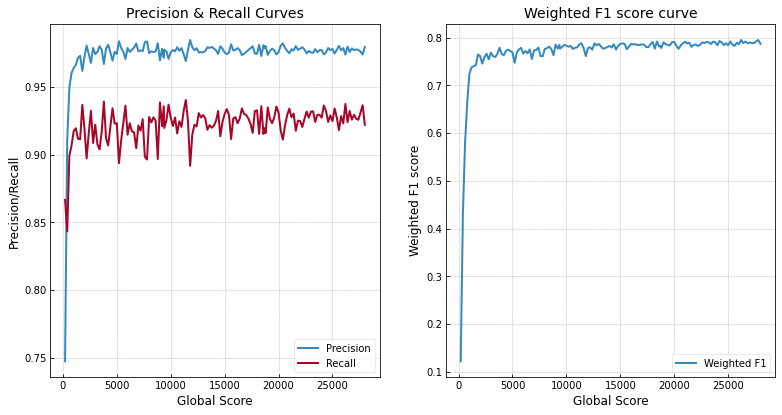

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6.5))

axes[0].set_title("Precision & Recall Curves", fontsize=14)
axes[0].plot(results['global_step'], results['precision'], label='Precision')
axes[0].plot(results['global_step'], results['recall'], label='Recall')
axes[0].set_xlabel("Global Score", fontsize=12)
axes[0].set_ylabel("Precision/Recall", fontsize=12)
axes[0].legend()

axes[1].set_title("Weighted F1 score curve", fontsize=14)
axes[1].plot(results['global_step'], results['f1_weighted'], label='Weighted F1')
axes[1].set_xlabel("Global Score", fontsize=12)
axes[1].set_ylabel("Weighted F1 score", fontsize=12)
axes[1].legend()

#### <span style='font-family:Georgia'> Comparison of confusion matrix at different stages of the learning process

In [6]:
labels = ["B", ":", ";", ",", ".", "-", "?", "!"]

init_conf_matr = results.iloc[results.index.min(), -4]
result_conf_matr = results.iloc[results.index.max(), -4]

init_conf_matr = convert_to_array(init_conf_matr)
result_conf_matr = convert_to_array(result_conf_matr)

display(Markdown("#### <span style='font-family:Georgia'> Confusion matrix at the beginning of the learning process"))
display(pd.DataFrame(init_conf_matr, columns=labels[1:], index=labels[1:]))

display(Markdown("#### <span style='font-family:Georgia'> Confusion matrix at the end of the learning process"))
display(pd.DataFrame(result_conf_matr, columns=labels[1:], index=labels[1:]))

#### <span style='font-family:Georgia'> Confusion matrix at the beginning of the learning process

:  ;    ,     .  -  ?  !
:  0  0   43   131  0  0  0
;  0  0    0     0  0  0  0
,  0  0  787  1543  0  0  0
.  0  0  668  2025  0  0  0
-  0  0  199   412  0  0  0
?  0  0   46   157  0  0  0
!  0  0    9    26  0  0  0

#### <span style='font-family:Georgia'> Confusion matrix at the end of the learning process

:  ;     ,     .     -    ?   !
:  621  0    33    95    53    2   0
;    0  0     0     0     0    0   0
,   22  0  8549   523   149   46  17
.   20  0   289  9761    51   38  14
-   45  0   313   273  1520   26   2
?    4  0    28   127     8  539   2
!    2  0    16    49     2   11  22

### <span style='font-family:Georgia'> Section 2.: Model evaluation

In [7]:
# TODO